In [1]:
import pandas as pd
dtype_dict = {
    'wm_yr_wk': 'int32',
    'wday': 'int8',
    'day': 'int32',
    'month': 'int8',
    'year': 'int32',
    'snap_CA': 'int8',
    'snap_WI': 'int8',
    'snap_TX': 'int8',
    'is_weekend': 'int8',
    'events_per_day': 'int8',
    'month_day': 'int32',
    'week_number': 'int32'
}

df = pd.read_csv('final_df_EDA.csv', dtype=dtype_dict)
df['date'] = pd.to_datetime(df['date'])

In [2]:
import matplotlib.pyplot as plt
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

NameError: name 'df' is not defined

In [4]:
df.head()

Unnamed: 0                             id        item_id    dept_id  \
0           7  HOBBIES_1_008_CA_1_evaluation  HOBBIES_1_008  HOBBIES_1   
1           8  HOBBIES_1_009_CA_1_evaluation  HOBBIES_1_009  HOBBIES_1   
2           9  HOBBIES_1_010_CA_1_evaluation  HOBBIES_1_010  HOBBIES_1   
3          11  HOBBIES_1_012_CA_1_evaluation  HOBBIES_1_012  HOBBIES_1   
4          14  HOBBIES_1_015_CA_1_evaluation  HOBBIES_1_015  HOBBIES_1   

    cat_id store_id state_id    d  sell_quantity       date  ...  snap_CA  \
0  HOBBIES     CA_1       CA  d_1             12 2011-01-29  ...        0   
1  HOBBIES     CA_1       CA  d_1              2 2011-01-29  ...        0   
2  HOBBIES     CA_1       CA  d_1              0 2011-01-29  ...        0   
3  HOBBIES     CA_1       CA  d_1              0 2011-01-29  ...        0   
4  HOBBIES     CA_1       CA  d_1              4 2011-01-29  ...        0   

  snap_TX  snap_WI  day  is_weekend month_day week_number events_per_day  \
0       0        0    1           1         1           4              0   
1       0        0    1           1         1           4              0   
2       0        0    1           1         1           4              0   
3       0        0    1           1         1           4              0   
4       0        0    1           1         1           4              0   

  sell_price  daily_sell  
0       0.46        5.52  
1       1.56        3.12  
2       3.17        0.00  
3       5.98        0.00  
4       0.70        2.80  

[5 rows x 29 columns]

In [5]:
len(df['id'].unique())

30490

In [6]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [7]:
import seaborn as sns
from tqdm import tqdm


data_Overall_State = df.groupby(['state_id', pd.Grouper(key='date', freq='W')])['daily_sell'].sum().to_frame('Total_Sell')
data_Overall_State = data_Overall_State.reset_index()
data_Overall_Store = df.groupby(['store_id', pd.Grouper(key='date', freq='W')])['daily_sell'].sum().to_frame('Total_Sell')
data_Overall_Store = data_Overall_Store.reset_index()
total_sales_by_store_category = df.groupby(['cat_id', pd.Grouper(key='date', freq='W')])['daily_sell'].sum().to_frame('Total_Sell')
total_sales_by_store_category = total_sales_by_store_category.reset_index()

data_CA = df.loc[df['state_id'] == 'CA']
data_TX = df.loc[df['state_id'] == 'TX']
data_WI = df.loc[df['state_id'] == 'WI']
total_sales_by_store_CA = data_CA.groupby(['store_id', pd.Grouper(key='date', freq='W')])['daily_sell'].sum().to_frame('Total_Sell')
total_sales_by_store_CA = total_sales_by_store_CA.reset_index()
total_sales_by_store_TX = data_TX.groupby(['store_id', pd.Grouper(key='date', freq='W')])['daily_sell'].sum().to_frame('Total_Sell')
total_sales_by_store_TX = total_sales_by_store_TX.reset_index()
total_sales_by_store_WI = data_WI.groupby(['store_id', pd.Grouper(key='date', freq='W')])['daily_sell'].sum().to_frame('Total_Sell')
total_sales_by_store_WI = total_sales_by_store_WI.reset_index()


In [4]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="state_id",
             data=data_Overall_State)
plt.legend( prop ={'size':18})
plt.title("Sales pattern of each State", fontsize = 30, weight = 'bold')

plt.ylabel("Daily total sales", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.show()

NameError: name 'plt' is not defined

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'Texas')

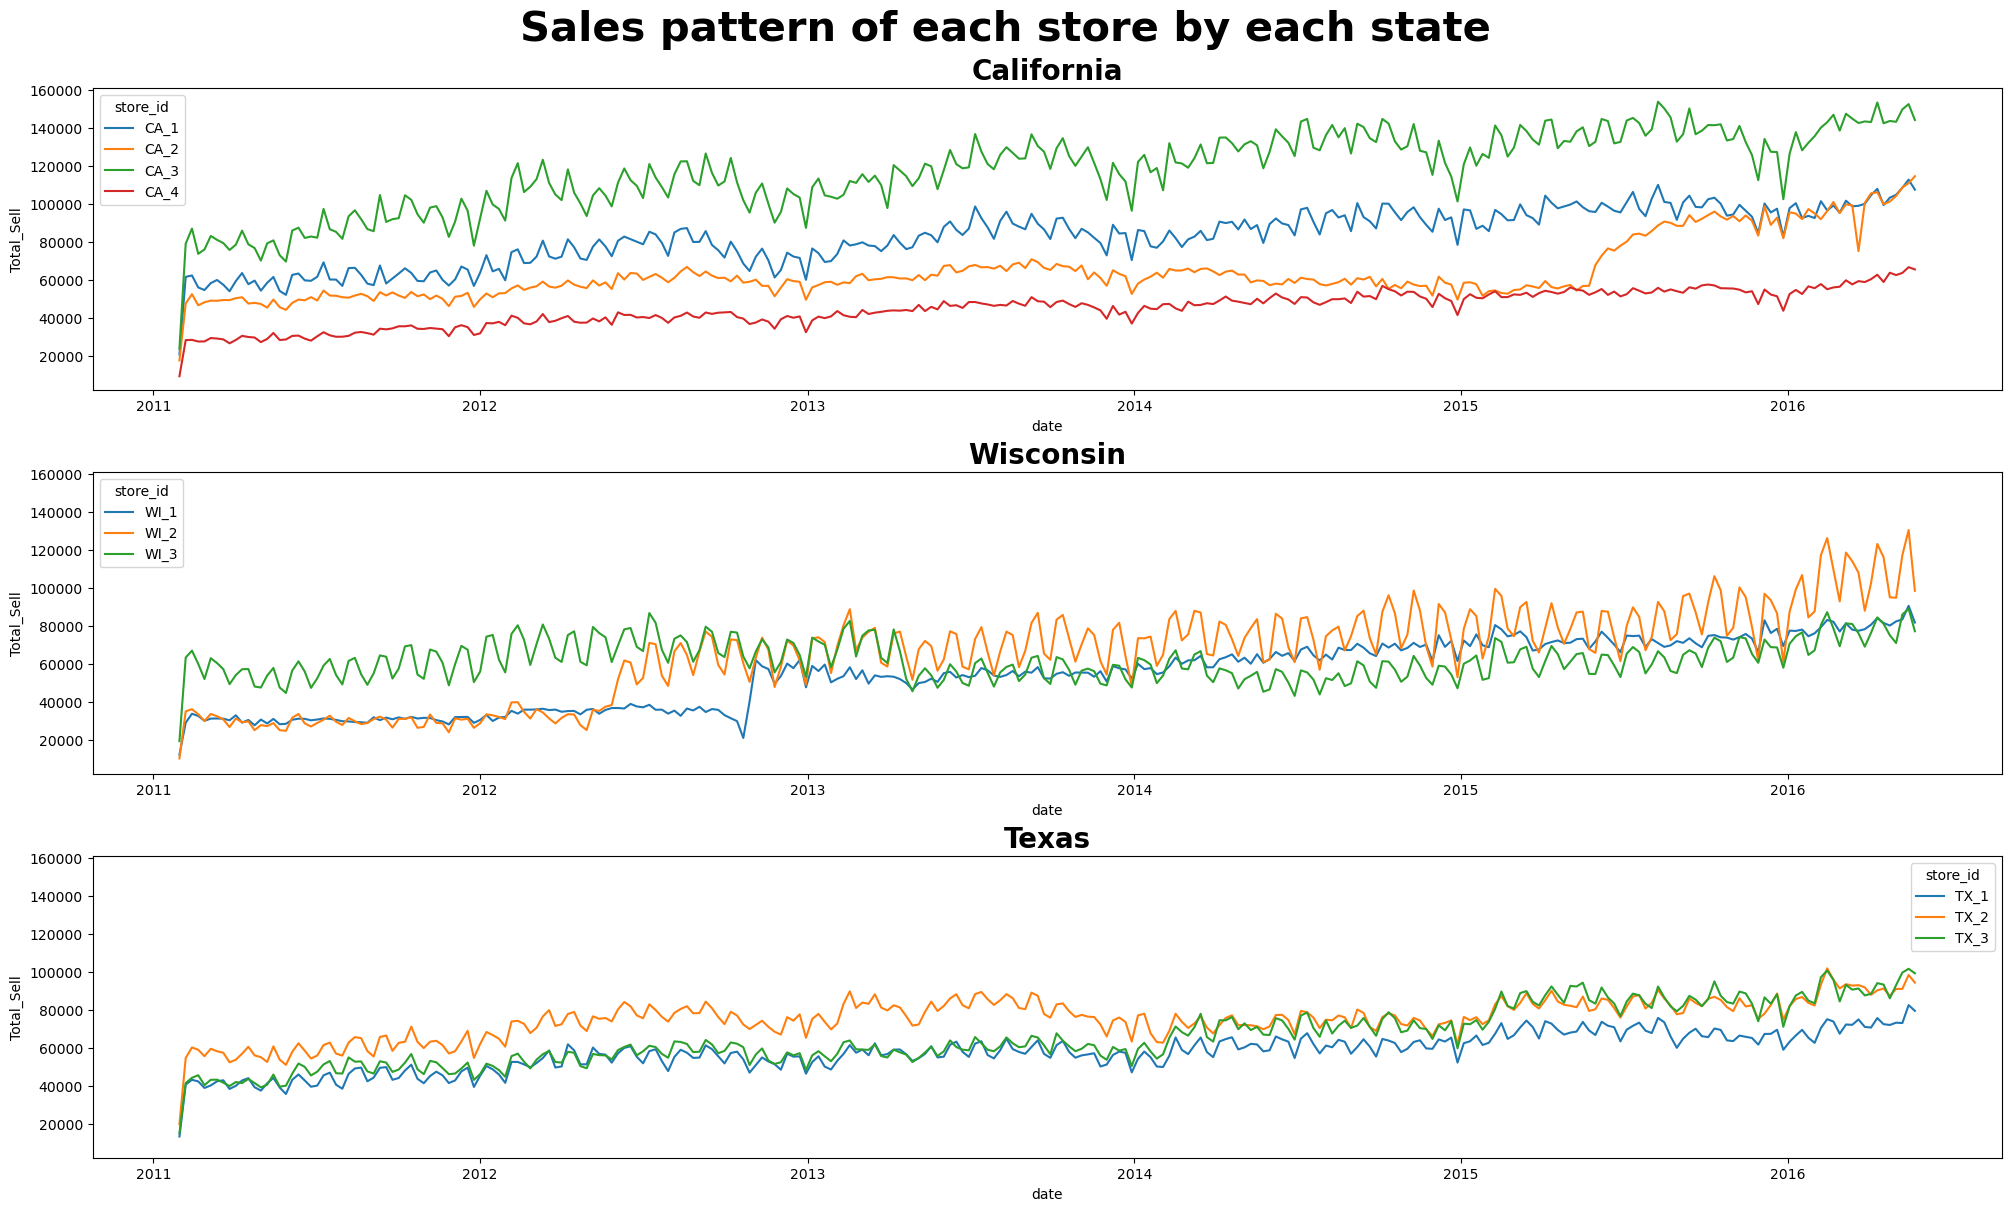

In [9]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales pattern of each store by each state', fontsize = 30, weight = 'bold')

snap_graph_CA = sns.lineplot(x = "date", y = "Total_Sell", hue="store_id", data = total_sales_by_store_CA, 
             ax = ax[0]) 
snap_graph_CA.set_title('California', size = 20, weight = 'bold')
snap_graph_WI =sns.lineplot(x = "date", y = "Total_Sell", hue="store_id",  data = total_sales_by_store_WI, 
             ax = ax[1]) 
snap_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')
snap_graph_TX =sns.lineplot(x = "date", y = "Total_Sell", hue="store_id", data = total_sales_by_store_TX, 
             ax = ax[2]) 
snap_graph_TX.set_title('Texas', size = 20, weight = 'bold')

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


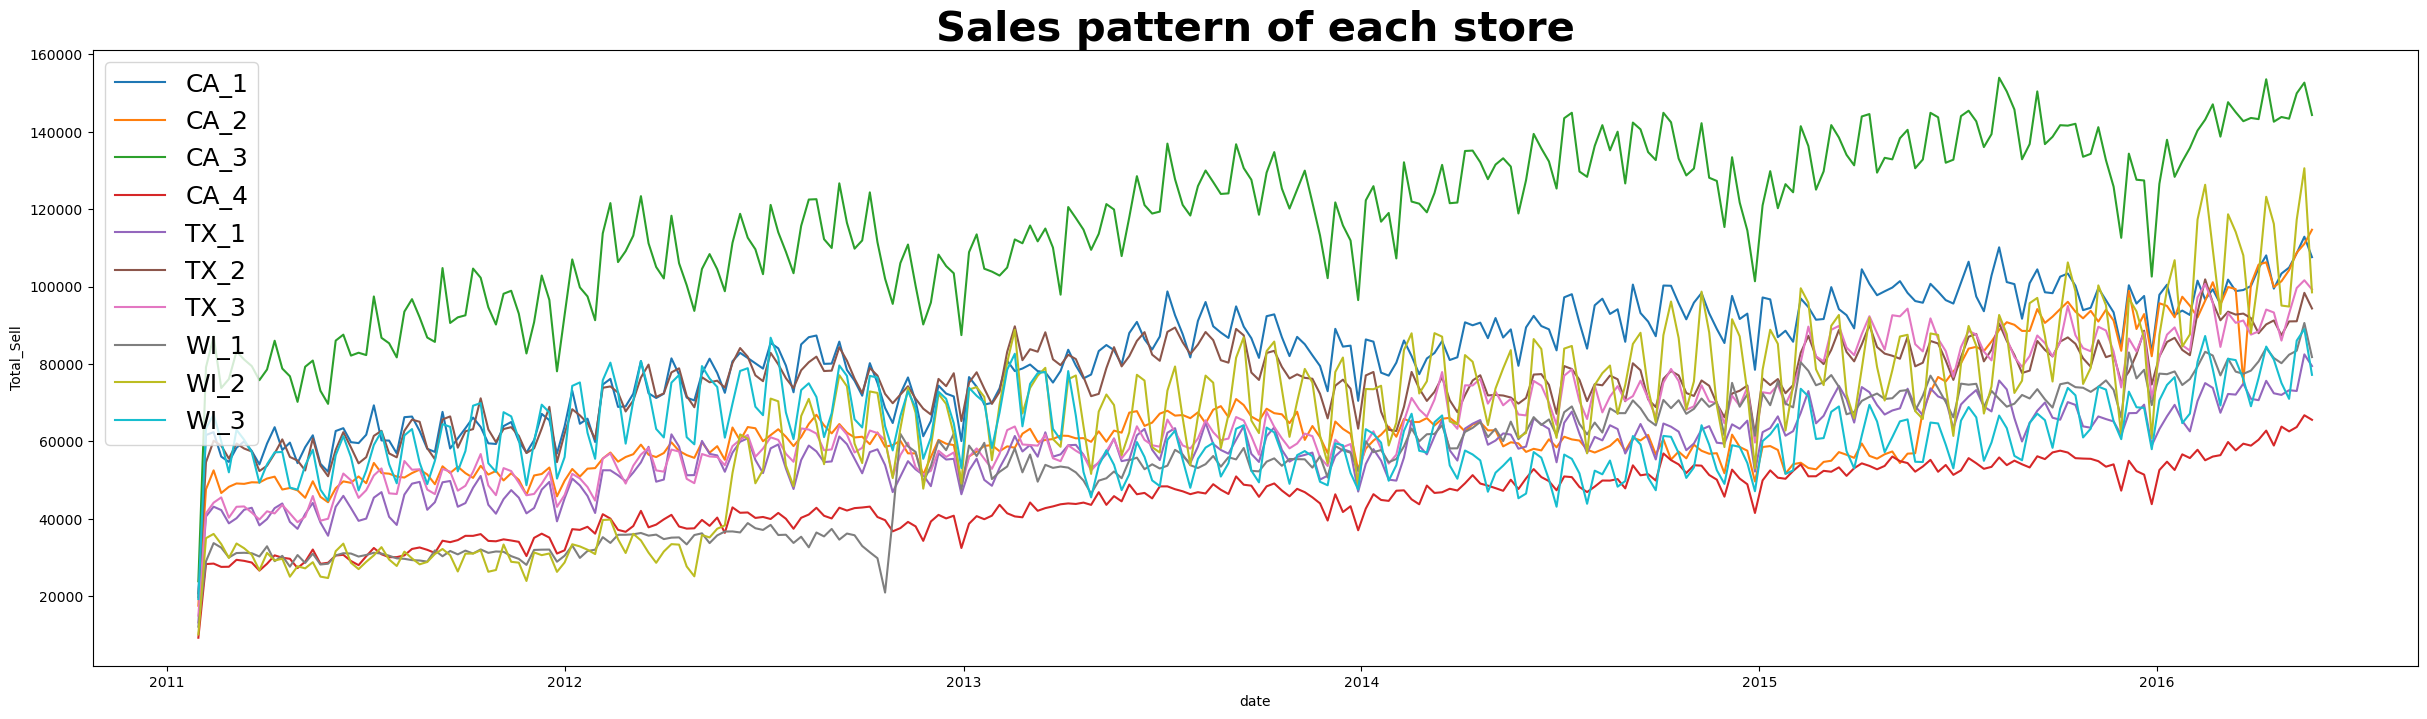

In [10]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="store_id",
             data=data_Overall_Store)
plt.legend( prop ={'size':18})
plt.title("Sales pattern of each store", fontsize = 30, weight = 'bold')
plt.show()

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


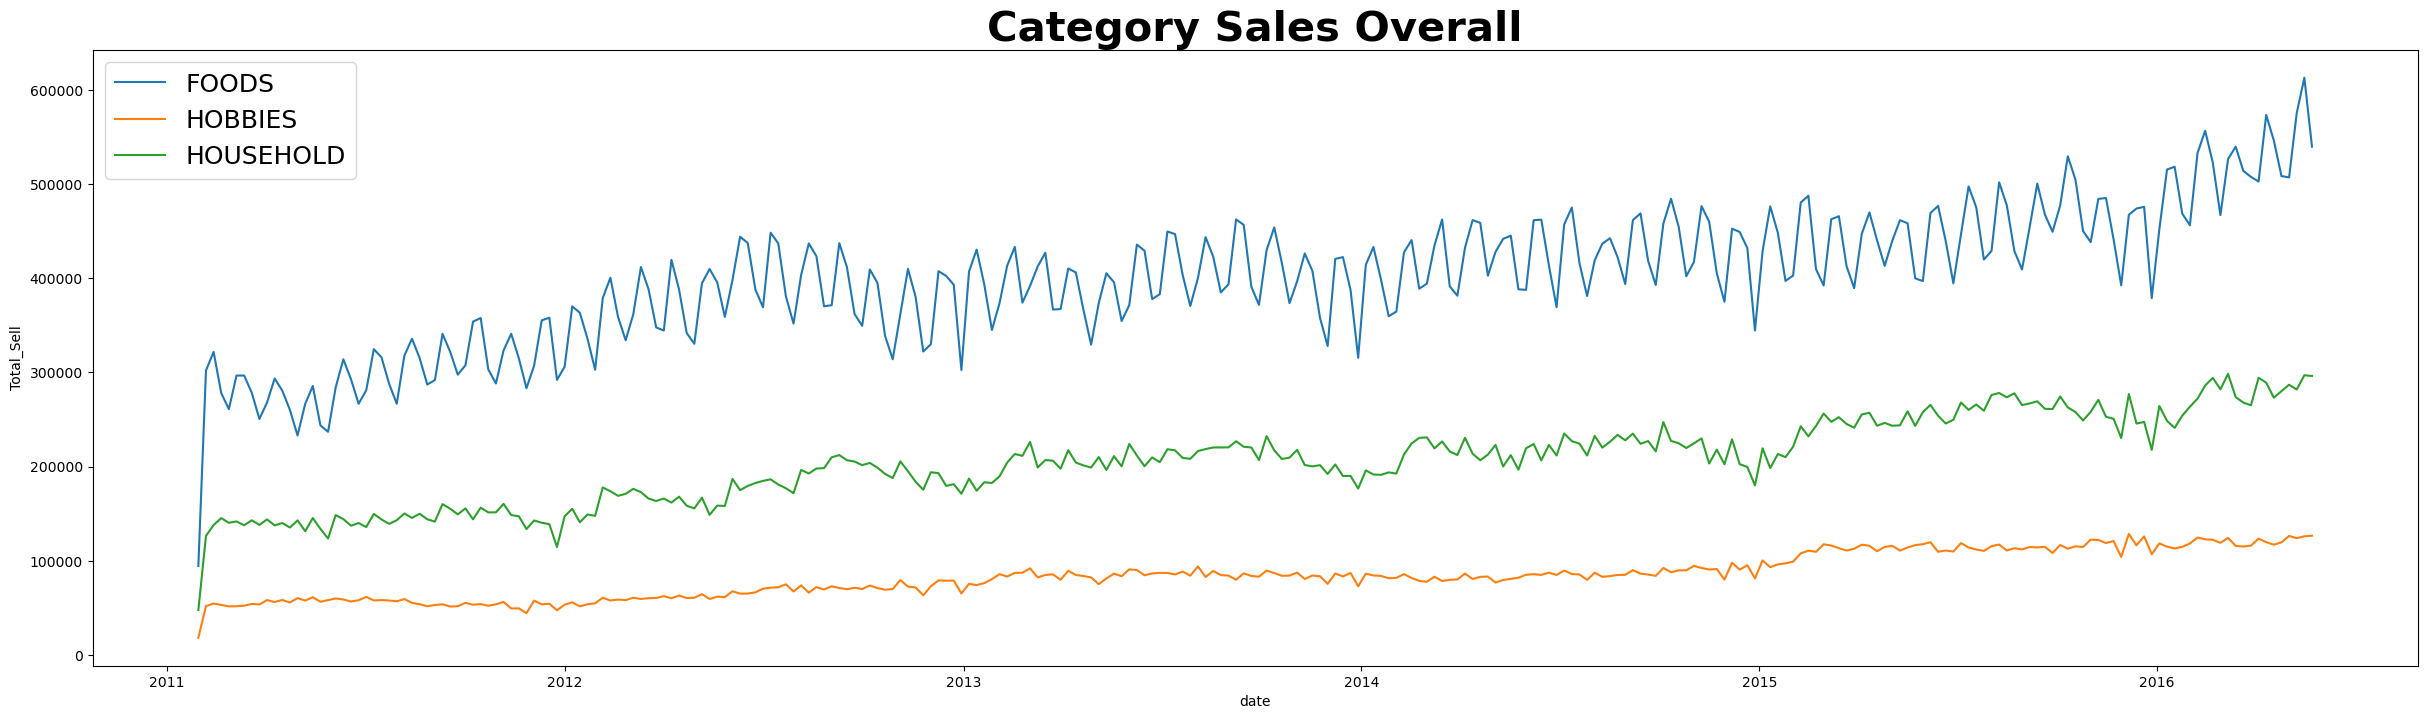

In [11]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_Sell",
             hue="cat_id",
             data=total_sales_by_store_category)
plt.legend( prop ={'size':18})
plt.title("Category Sales Overall", fontsize = 30, weight = 'bold')
plt.show()

In [12]:
data_merge_calender_date = df.groupby(['date','weekday'])['daily_sell'].sum().to_frame('Total_sell_per_day')

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


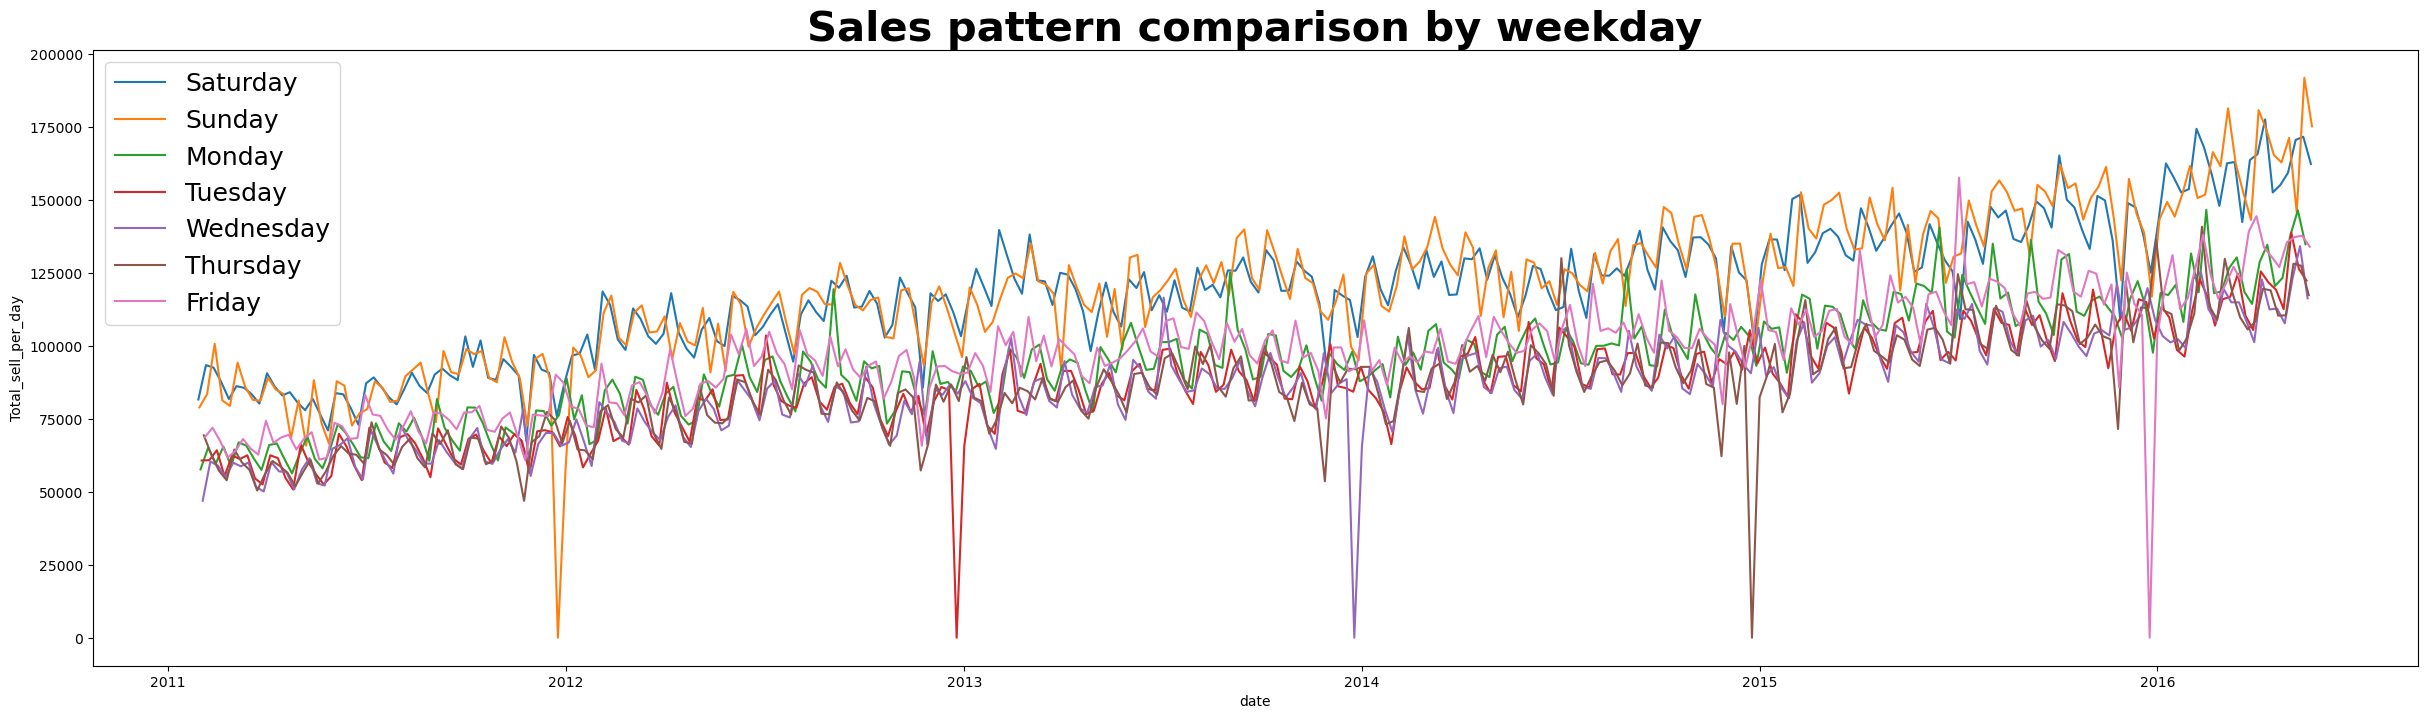

In [13]:
plt.figure(figsize=(30, 8))
sns.lineplot(x="date", y="Total_sell_per_day",
             hue="weekday",
             data=data_merge_calender_date)
plt.legend(prop ={'size':18})
plt.title("Sales pattern comparison by weekday", fontsize = 30, weight = 'bold')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46881677 entries, 0 to 46881676
Data columns (total 28 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              object        
 1   item_id         object        
 2   dept_id         object        
 3   cat_id          object        
 4   store_id        object        
 5   state_id        object        
 6   d               object        
 7   sell_quantity   int64         
 8   date            datetime64[ns]
 9   wm_yr_wk        int32         
 10  weekday         object        
 11  wday            int8          
 12  month           int8          
 13  year            int32         
 14  event_name_1    object        
 15  event_type_1    object        
 16  event_name_2    object        
 17  event_type_2    object        
 18  snap_CA         int8          
 19  snap_TX         int8          
 20  snap_WI         int8          
 21  day             int32         
 22  is_weekend      

In [34]:
date_s_CA = df.loc[df['state_id'] == 'CA'].groupby(['snap_CA', pd.Grouper(key='date', freq='W')])['daily_sell'].mean().to_frame('Weekly_Sell').reset_index()
date_s_CA['snap_CA'] = date_s_CA['snap_CA'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

date_s_WI = df.loc[df['state_id'] == 'WI'].groupby(['snap_WI', pd.Grouper(key='date', freq='W')])['daily_sell'].mean().to_frame('Weekly_Sell').reset_index()
date_s_WI['snap_WI'] = date_s_WI['snap_WI'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

date_s_TX = df.loc[df['state_id'] == 'TX'].groupby(['snap_TX', pd.Grouper(key='date', freq='W')])['daily_sell'].mean().to_frame('Weekly_Sell').reset_index()
date_s_TX['snap_TX'] = date_s_TX['snap_TX'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

In [35]:
data_merge_calender_date_CA.head()

snap_CA       date  Weekly_Sell
0  SNAP_not_available 2011-01-30     7.898512
1  SNAP_not_available 2011-02-06     5.599940
2  SNAP_not_available 2011-02-13     7.662358
3  SNAP_not_available 2011-02-20     5.708294
4  SNAP_not_available 2011-02-27     5.669277

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'Texas')

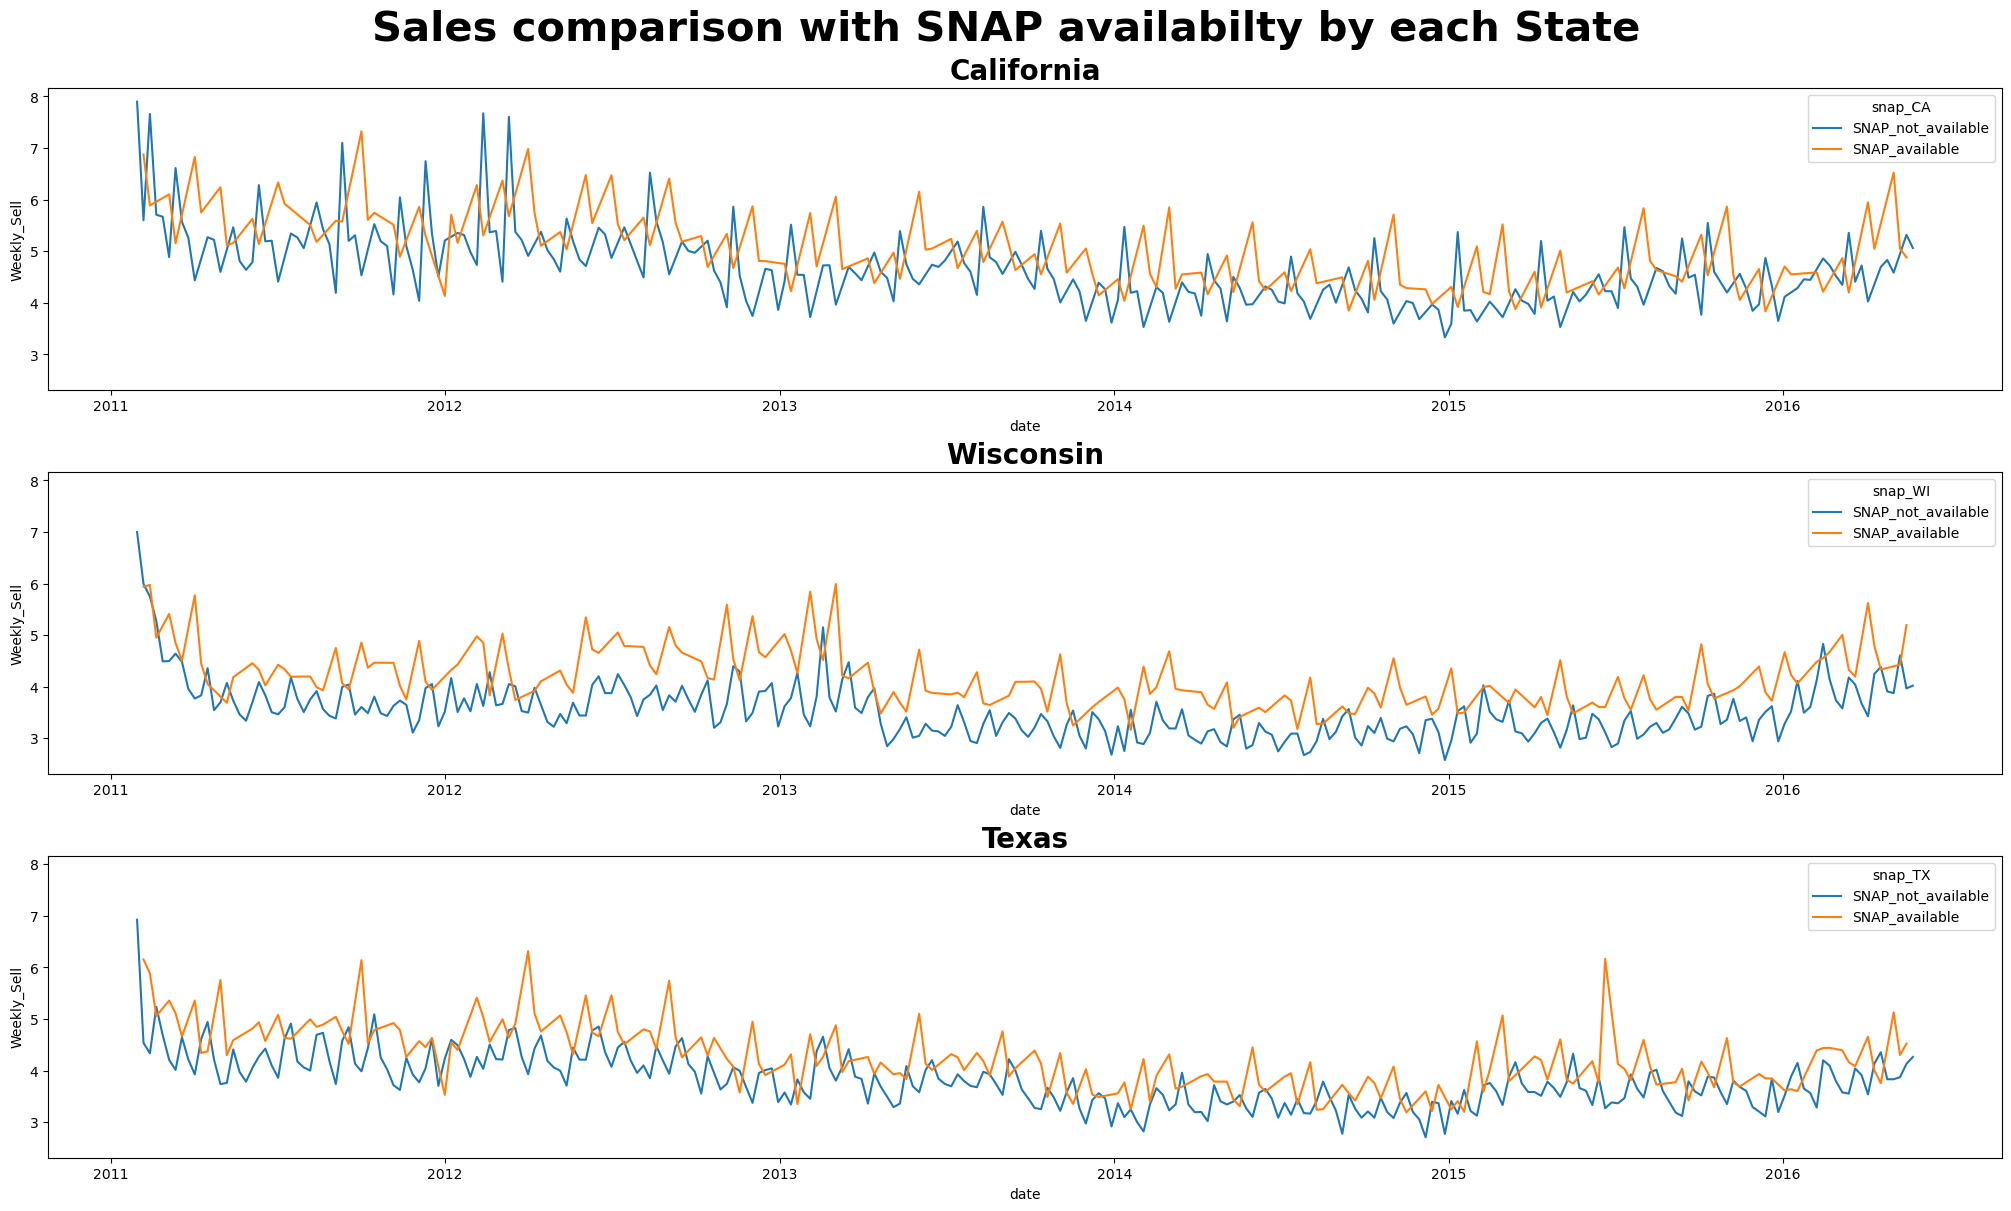

In [37]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales comparison with SNAP availabilty by each State', fontsize = 30, weight = 'bold')

snap_graph_CA = sns.lineplot(x = "date", y = "Weekly_Sell", hue="snap_CA", data = date_s_CA, 
             ax = ax[0]) 
snap_graph_CA.set_title('California', size = 20, weight = 'bold')
snap_graph_WI =sns.lineplot(x = "date", y = "Weekly_Sell", hue="snap_WI",  data = date_s_WI, 
             ax = ax[1]) 
snap_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')
snap_graph_TX =sns.lineplot(x = "date", y = "Weekly_Sell", hue="snap_TX", data = date_s_TX, 
             ax = ax[2]) 
snap_graph_TX.set_title('Texas', size = 20, weight = 'bold')

In [38]:
date_cat_D_CA = df.loc[df['state_id'] == 'CA'].groupby(['cat_id','snap_CA',pd.Grouper(key='date', freq='W')])['daily_sell'].sum().to_frame('Total_daily_sell').reset_index()
date_cat_D_CA['snap_CA'] = date_cat_D_CA['snap_CA'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

date_cat_D_WI = df.loc[df['state_id'] == 'WI'].groupby(['cat_id','snap_WI',pd.Grouper(key='date', freq='W')])['daily_sell'].sum().to_frame('Total_daily_sell').reset_index()
date_cat_D_WI['snap_WI'] = date_cat_D_WI['snap_WI'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

date_cat_D_TX = df.loc[df['state_id'] == 'TX'].groupby(['cat_id','snap_TX',pd.Grouper(key='date', freq='W')])['daily_sell'].sum().to_frame('Total_daily_sell').reset_index()
date_cat_D_TX['snap_TX'] = date_cat_D_TX['snap_TX'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

date_cat_D_CA['cat_id_SNAP'] = date_cat_D_CA['cat_id'] +'_'+date_cat_D_CA['snap_CA']
date_cat_D_WI['cat_id_SNAP'] = date_cat_D_WI['cat_id'] +'_'+date_cat_D_WI['snap_WI']
date_cat_D_TX['cat_id_SNAP'] = date_cat_D_TX['cat_id'] +'_'+date_cat_D_TX['snap_TX']

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

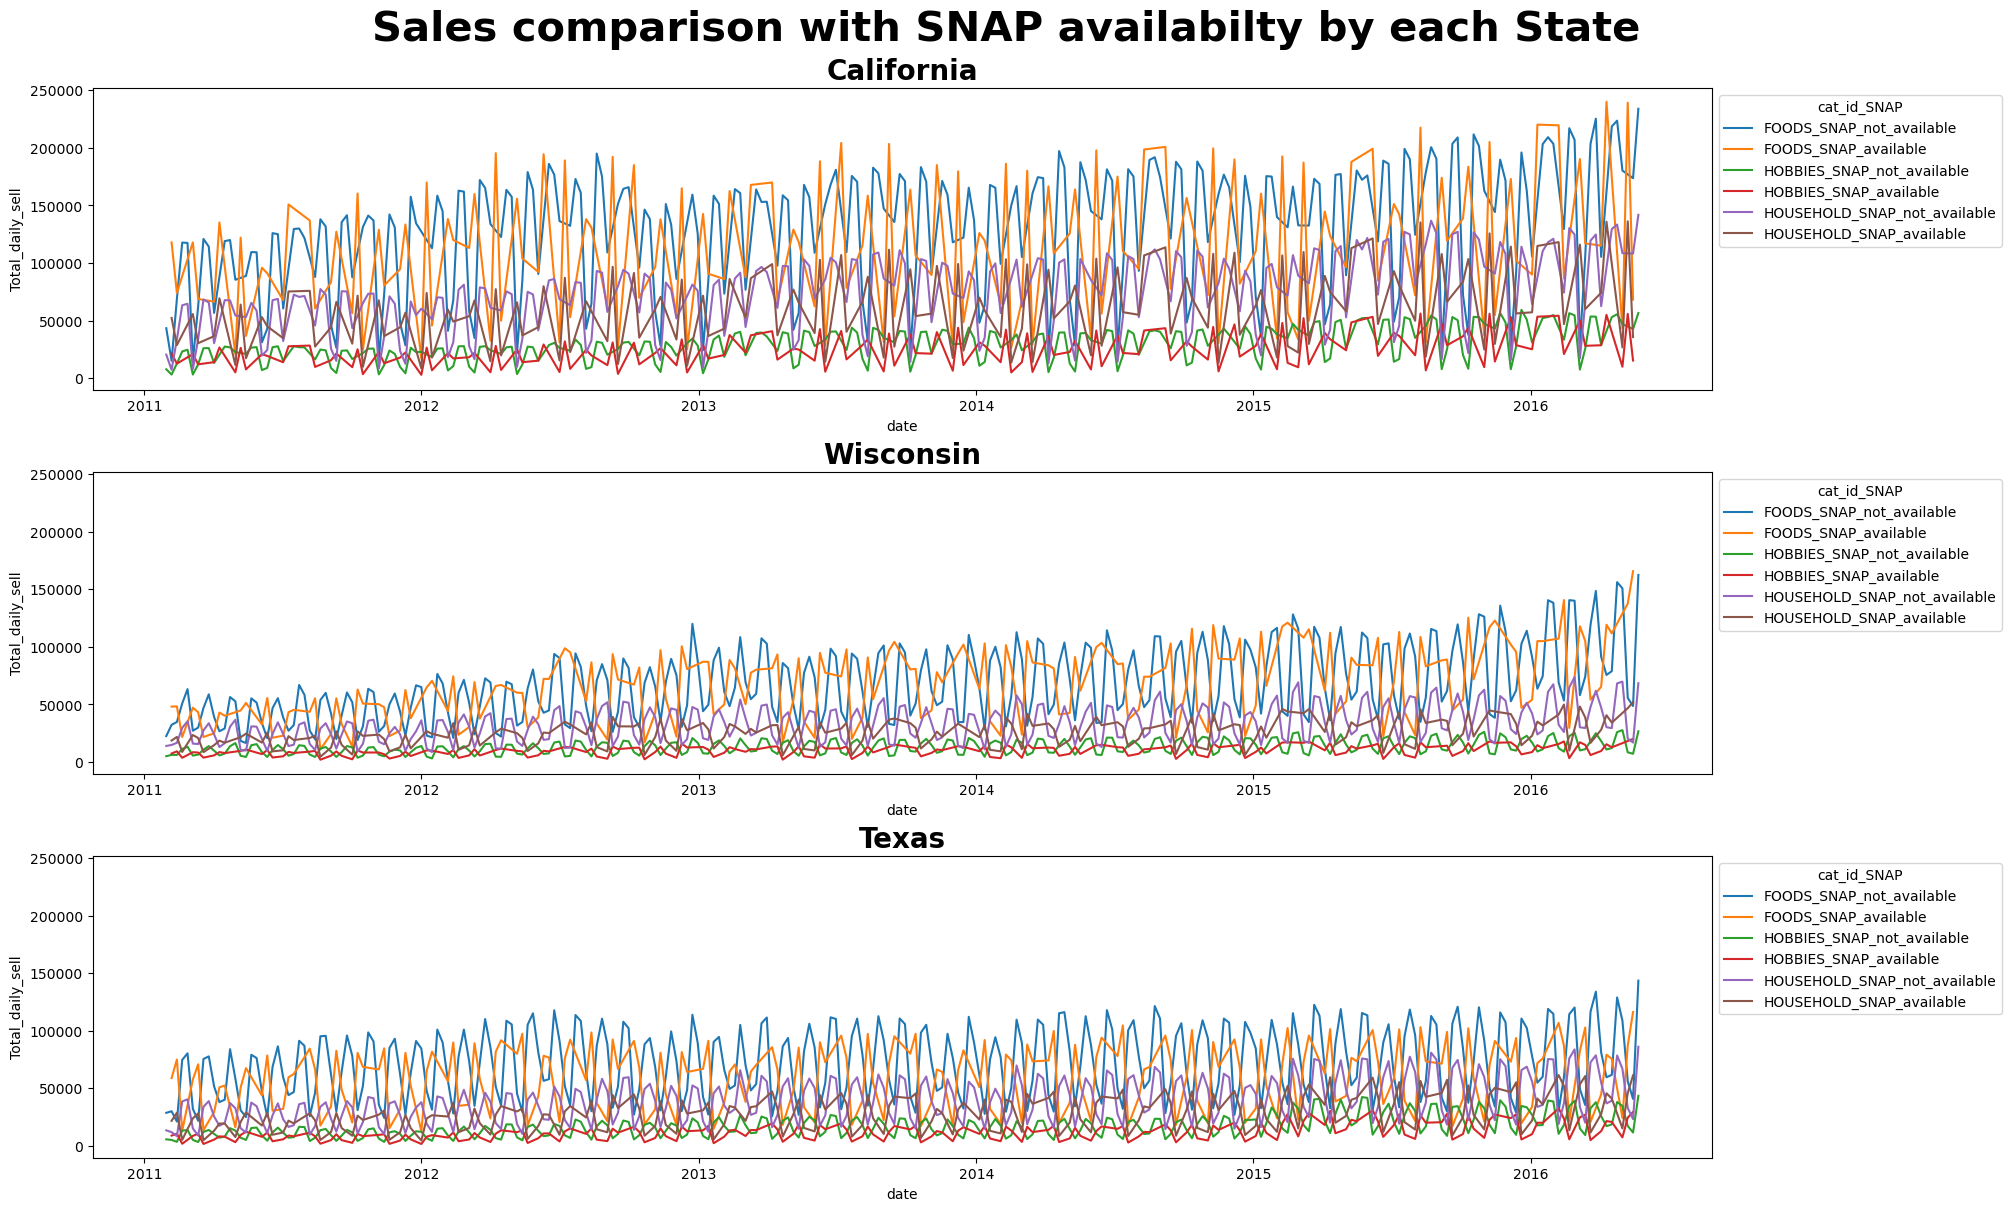

In [39]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales comparison with SNAP availabilty by each State', fontsize = 30, weight = 'bold')

snap_graph_CA = sns.lineplot(x = "date", y = "Total_daily_sell", hue="cat_id_SNAP", data = date_cat_D_CA, 
             ax = ax[0]) 
snap_graph_CA.set_title('California', size = 20, weight = 'bold')
#Move the legend to the out of the box
sns.move_legend(snap_graph_CA, "upper left", bbox_to_anchor=(1, 1))

snap_graph_WI =sns.lineplot(x = "date", y = "Total_daily_sell", hue="cat_id_SNAP",  data = date_cat_D_WI, 
             ax = ax[1]) 
snap_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')
#Move the legend to the out of the box
sns.move_legend(snap_graph_WI, "upper left", bbox_to_anchor=(1, 1))

snap_graph_TX =sns.lineplot(x = "date", y = "Total_daily_sell", hue="cat_id_SNAP", data = date_cat_D_TX, 
             ax = ax[2]) 
snap_graph_TX.set_title('Texas', size = 20, weight = 'bold')
#Move the legend to the out of the box
sns.move_legend(snap_graph_TX, "upper left", bbox_to_anchor=(1, 1))

In [40]:
date_cat_W_CA = df.loc[df['state_id'] == 'CA'].groupby(['cat_id','snap_CA',pd.Grouper(key='date', freq='W')])['daily_sell'].mean().to_frame('Weekly_Mean_Sell').reset_index()
date_cat_W_CA['snap_CA'] = date_cat_W_CA['snap_CA'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

date_cat_W_WI = df.loc[df['state_id'] == 'WI'].groupby(['cat_id','snap_WI',pd.Grouper(key='date', freq='W')])['daily_sell'].mean().to_frame('Weekly_Mean_Sell').reset_index()
date_cat_W_WI['snap_WI'] = date_cat_W_WI['snap_WI'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

date_cat_W_TX = df.loc[df['state_id'] == 'TX'].groupby(['cat_id','snap_TX',pd.Grouper(key='date', freq='W')])['daily_sell'].mean().to_frame('Weekly_Mean_Sell').reset_index()
date_cat_W_TX['snap_TX'] = date_cat_W_TX['snap_TX'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

date_cat_W_CA['cat_id_SNAP'] = date_cat_W_CA['cat_id'] +'_'+date_cat_W_CA['snap_CA']
date_cat_W_WI['cat_id_SNAP'] = date_cat_W_WI['cat_id'] +'_'+date_cat_W_WI['snap_WI']
date_cat_W_TX['cat_id_SNAP'] = date_cat_W_TX['cat_id'] +'_'+date_cat_W_TX['snap_TX']

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

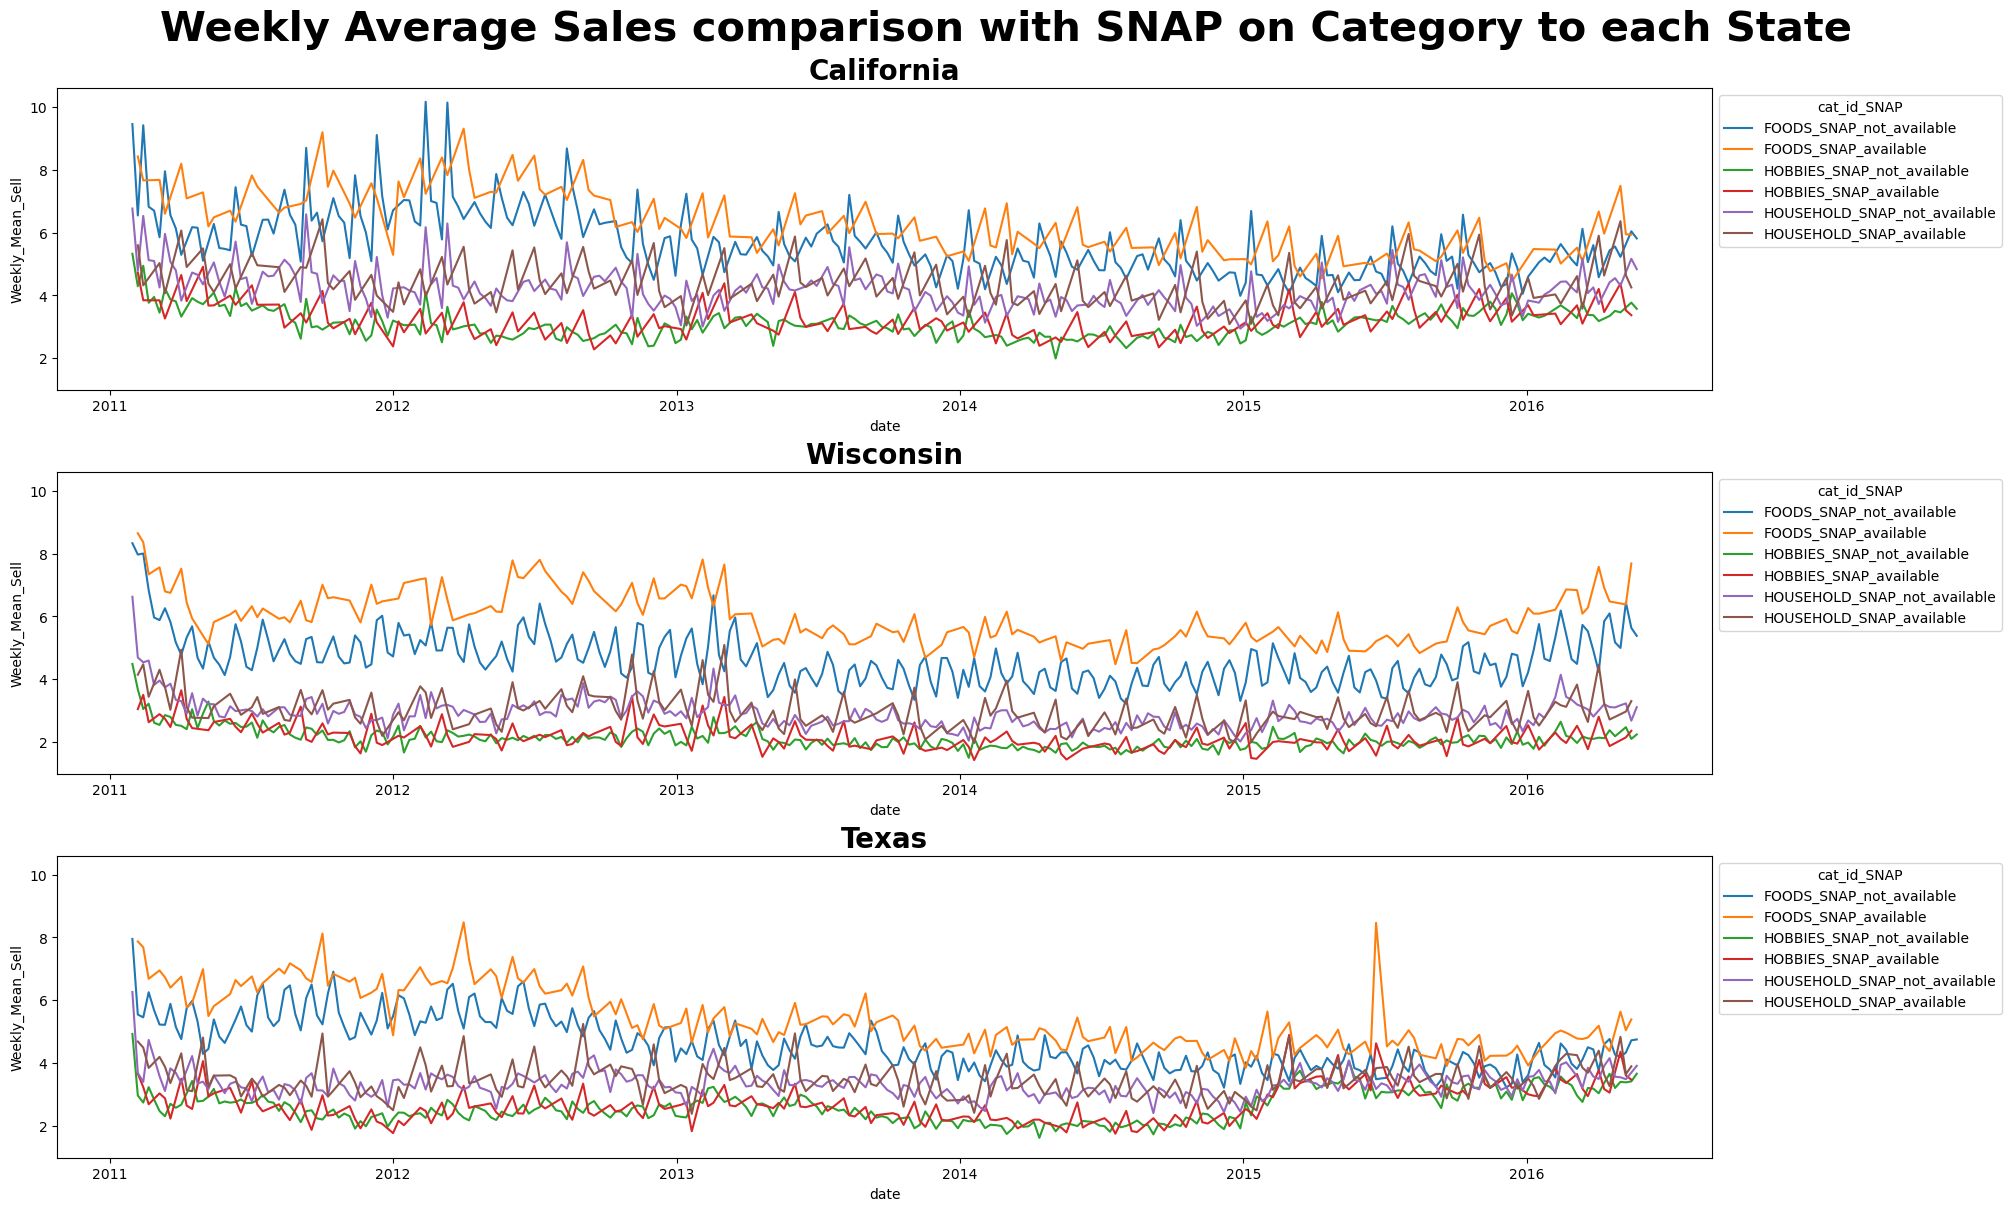

In [41]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Weekly Average Sales comparison with SNAP on Category to each State', fontsize = 30, weight = 'bold')

snap_W_graph_CA = sns.lineplot(x = "date", y = "Weekly_Mean_Sell", hue="cat_id_SNAP", data = date_cat_W_CA, 
             ax = ax[0]) 
snap_W_graph_CA.set_title('California', size = 20, weight = 'bold')
#Move the legend to the out of the box
sns.move_legend(snap_W_graph_CA, "upper left", bbox_to_anchor=(1, 1))

snap_W_graph_WI =sns.lineplot(x = "date", y = "Weekly_Mean_Sell", hue="cat_id_SNAP",  data = date_cat_W_WI, 
             ax = ax[1]) 
snap_W_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')
#Move the legend to the out of the box
sns.move_legend(snap_W_graph_WI, "upper left", bbox_to_anchor=(1, 1))

snap_W_graph_TX =sns.lineplot(x = "date", y = "Weekly_Mean_Sell", hue="cat_id_SNAP", data = date_cat_W_TX, 
             ax = ax[2]) 
snap_W_graph_TX.set_title('Texas', size = 20, weight = 'bold')
#Move the legend to the out of the box
sns.move_legend(snap_W_graph_TX, "upper left", bbox_to_anchor=(1, 1))

In [42]:
cat_snap_sell_q_CA = df.loc[df['state_id'] == 'CA'].groupby(['cat_id','snap_CA',pd.Grouper(key='date', freq='W')])['sell_quantity'].mean().to_frame('Weekly_Mean_Items_Sold').reset_index()
cat_snap_sell_q_CA['snap_CA'] = cat_snap_sell_q_CA['snap_CA'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

cat_snap_sell_q_WI = df.loc[df['state_id'] == 'WI'].groupby(['cat_id','snap_WI',pd.Grouper(key='date', freq='W')])['sell_quantity'].mean().to_frame('Weekly_Mean_Items_Sold').reset_index()
cat_snap_sell_q_WI['snap_WI'] = cat_snap_sell_q_WI['snap_WI'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

cat_snap_sell_q_TX = df.loc[df['state_id'] == 'TX'].groupby(['cat_id','snap_TX',pd.Grouper(key='date', freq='W')])['sell_quantity'].mean().to_frame('Weekly_Mean_Items_Sold').reset_index()
cat_snap_sell_q_TX['snap_TX'] = cat_snap_sell_q_TX['snap_TX'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

cat_snap_sell_q_CA['cat_id_SNAP'] = cat_snap_sell_q_CA['cat_id'] +'_'+cat_snap_sell_q_CA['snap_CA']
cat_snap_sell_q_WI['cat_id_SNAP'] = cat_snap_sell_q_WI['cat_id'] +'_'+cat_snap_sell_q_WI['snap_WI']
cat_snap_sell_q_TX['cat_id_SNAP'] = cat_snap_sell_q_TX['cat_id'] +'_'+cat_snap_sell_q_TX['snap_TX']

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

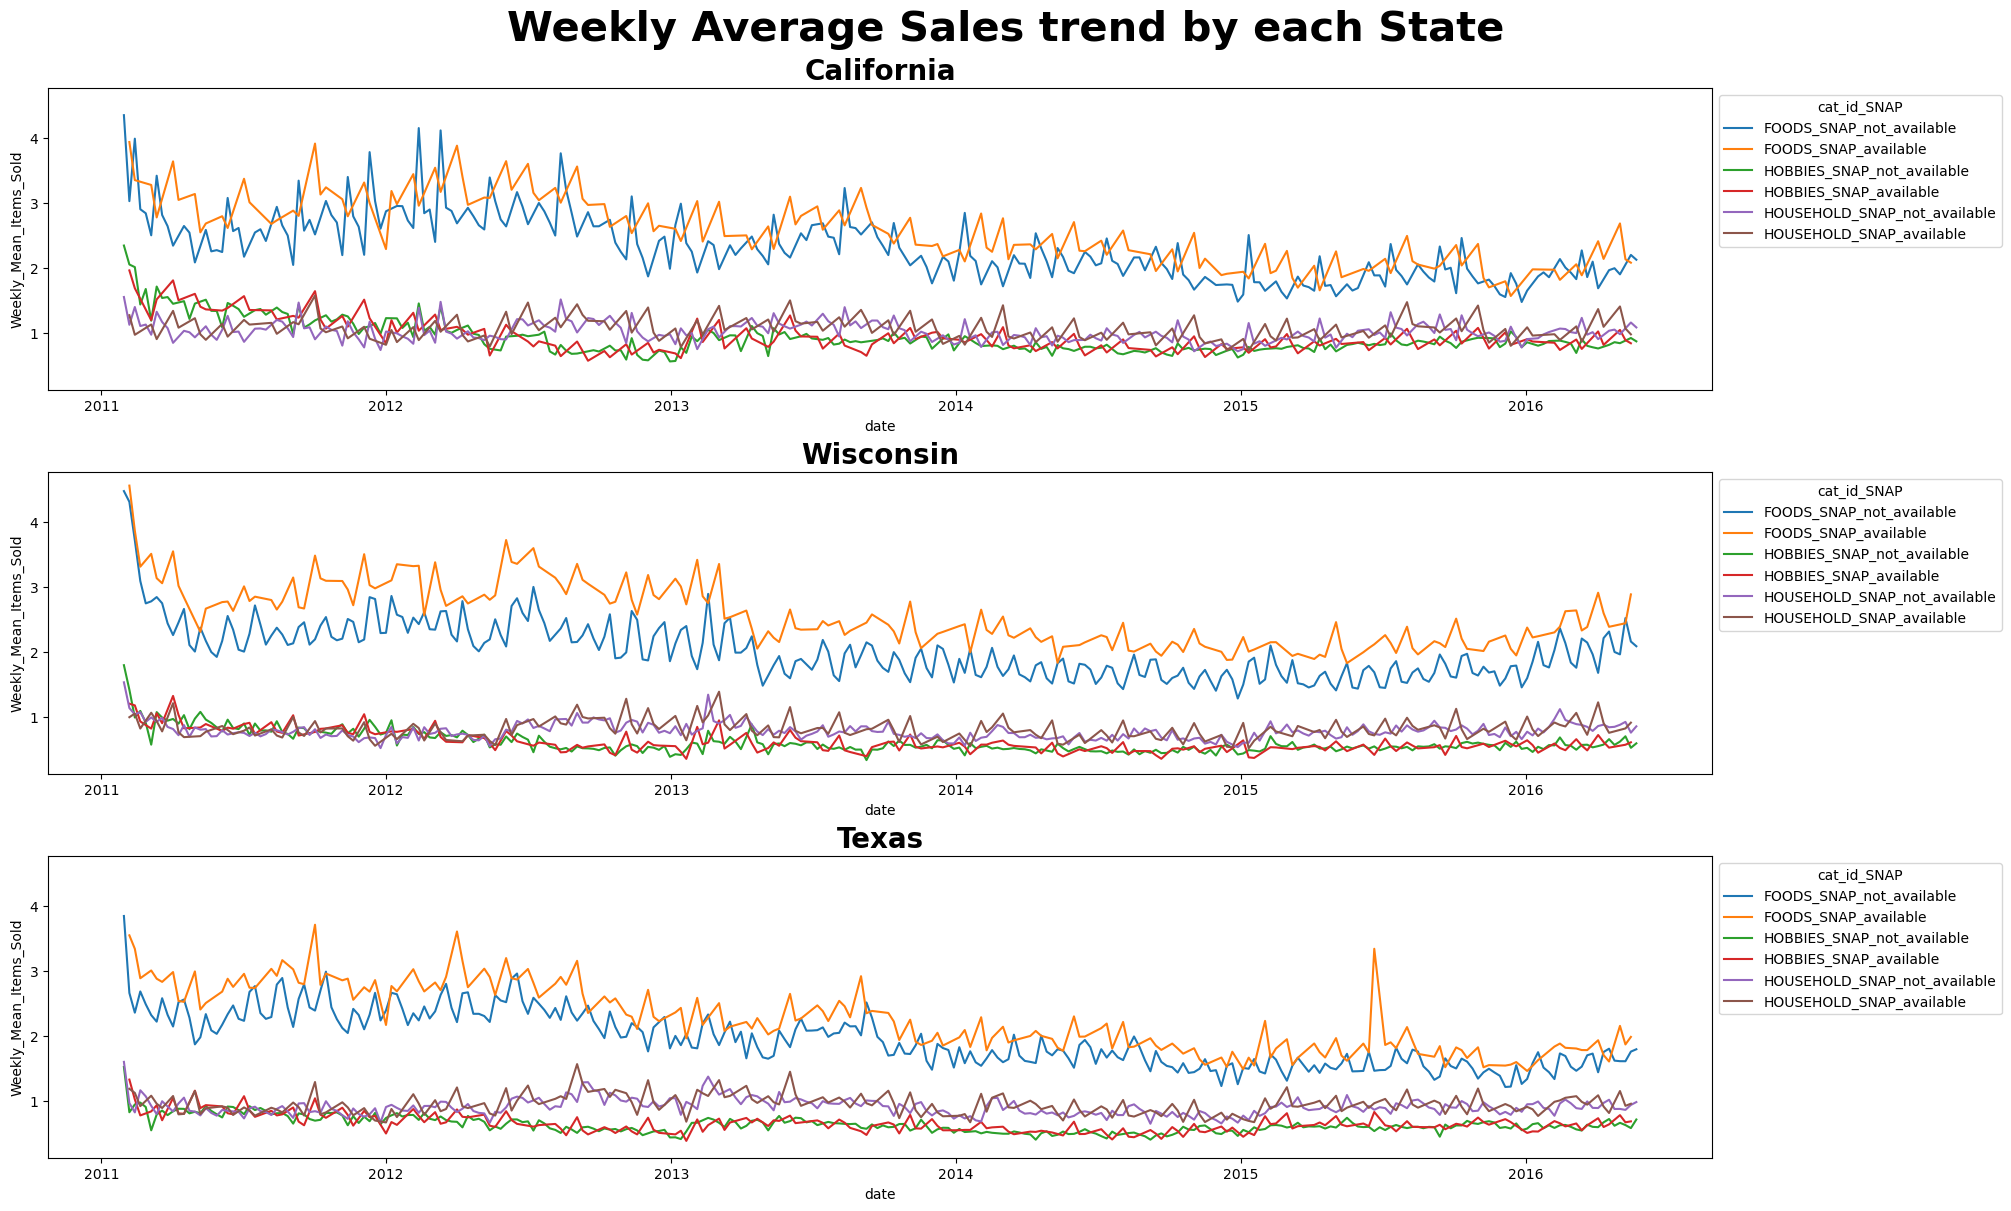

In [43]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Weekly Average Sales trend by each State', fontsize = 30, weight = 'bold')

snap_cat_graph_CA = sns.lineplot(x = "date", y = "Weekly_Mean_Items_Sold", hue="cat_id_SNAP", data = cat_snap_sell_q_CA, 
             ax = ax[0]) 
snap_cat_graph_CA.set_title('California', size = 20, weight = 'bold')
#Move the legend to the out of the box
sns.move_legend(snap_cat_graph_CA, "upper left", bbox_to_anchor=(1, 1))

snap_cat_graph_WI =sns.lineplot(x = "date", y = "Weekly_Mean_Items_Sold", hue="cat_id_SNAP",  data = cat_snap_sell_q_WI, 
             ax = ax[1]) 
snap_cat_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')
#Move the legend to the out of the box
sns.move_legend(snap_cat_graph_WI, "upper left", bbox_to_anchor=(1, 1))

snap_cat_graph_TX =sns.lineplot(x = "date", y = "Weekly_Mean_Items_Sold", hue="cat_id_SNAP", data = cat_snap_sell_q_TX, 
             ax = ax[2]) 
snap_cat_graph_TX.set_title('Texas', size = 20, weight = 'bold')
#Move the legend to the out of the box
sns.move_legend(snap_cat_graph_TX, "upper left", bbox_to_anchor=(1, 1))

In [44]:
cat_snap_sell_q_m_CA = df.loc[df['state_id'] == 'CA'].groupby(['cat_id','snap_CA',pd.Grouper(key='date', freq='M')])['sell_quantity'].mean().to_frame('Monthly_Mean_Items_Sold').reset_index()
cat_snap_sell_q_m_CA['snap_CA'] = cat_snap_sell_q_m_CA['snap_CA'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

cat_snap_sell_q_m_WI = df.loc[df['state_id'] == 'WI'].groupby(['cat_id','snap_WI',pd.Grouper(key='date', freq='M')])['sell_quantity'].mean().to_frame('Monthly_Mean_Items_Sold').reset_index()
cat_snap_sell_q_m_WI['snap_WI'] = cat_snap_sell_q_m_WI['snap_WI'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

cat_snap_sell_q_m_TX = df.loc[df['state_id'] == 'TX'].groupby(['cat_id','snap_TX',pd.Grouper(key='date', freq='M')])['sell_quantity'].mean().to_frame('Monthly_Mean_Items_Sold').reset_index()
cat_snap_sell_q_m_TX['snap_TX'] = cat_snap_sell_q_m_TX['snap_TX'].replace([0, 1], ['SNAP_not_available', 'SNAP_available'], regex=True )

cat_snap_sell_q_m_CA['cat_id_SNAP'] = cat_snap_sell_q_m_CA['cat_id'] +'_'+cat_snap_sell_q_m_CA['snap_CA']
cat_snap_sell_q_m_WI['cat_id_SNAP'] = cat_snap_sell_q_m_WI['cat_id'] +'_'+cat_snap_sell_q_m_WI['snap_WI']
cat_snap_sell_q_m_TX['cat_id_SNAP'] = cat_snap_sell_q_m_TX['cat_id'] +'_'+cat_snap_sell_q_m_TX['snap_TX']

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

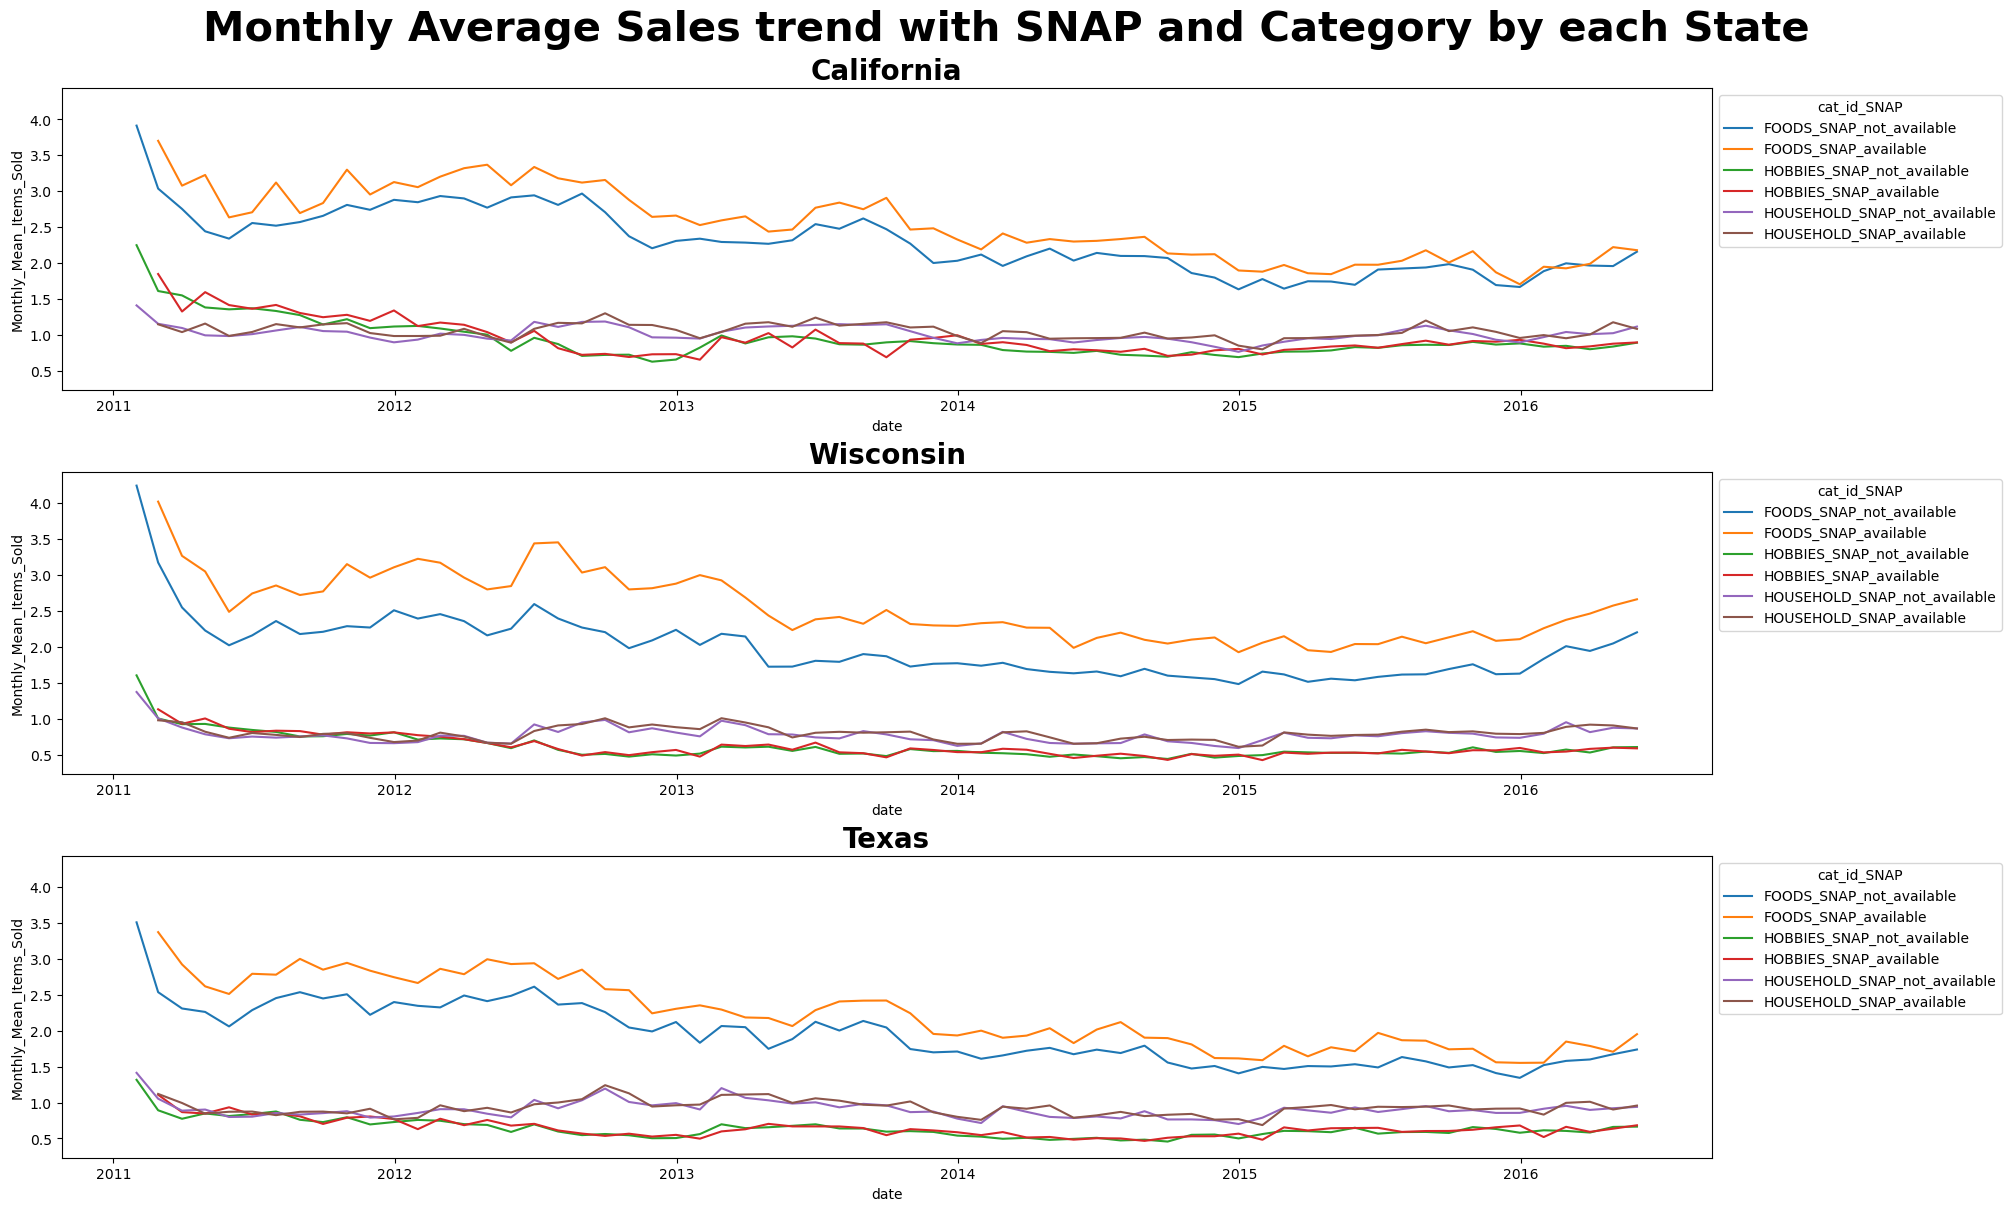

In [45]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Monthly Average Sales trend with SNAP and Category by each State', fontsize = 30, weight = 'bold')

snap_cat_graph_month_CA = sns.lineplot(x = "date", y = "Monthly_Mean_Items_Sold", hue="cat_id_SNAP", data = cat_snap_sell_q_m_CA, 
             ax = ax[0]) 
snap_cat_graph_month_CA.set_title('California', size = 20, weight = 'bold')
#Move the legend to the out of the box
sns.move_legend(snap_cat_graph_month_CA, "upper left", bbox_to_anchor=(1, 1))

snap_cat_graph_month_WI =sns.lineplot(x = "date", y = "Monthly_Mean_Items_Sold", hue="cat_id_SNAP",  data = cat_snap_sell_q_m_WI, 
             ax = ax[1]) 
snap_cat_graph_month_WI.set_title('Wisconsin', size = 20, weight = 'bold')
#Move the legend to the out of the box
sns.move_legend(snap_cat_graph_month_WI, "upper left", bbox_to_anchor=(1, 1))

snap_cat_graph_month_TX =sns.lineplot(x = "date", y = "Monthly_Mean_Items_Sold", hue="cat_id_SNAP", data = cat_snap_sell_q_m_TX, 
             ax = ax[2]) 
snap_cat_graph_month_TX.set_title('Texas', size = 20, weight = 'bold')
#Move the legend to the out of the box
sns.move_legend(snap_cat_graph_month_TX, "upper left", bbox_to_anchor=(1, 1))

In [46]:
sell_month_CA = df.loc[df['state_id'] == 'CA'].groupby(['year','month'])['sell_quantity'].sum().to_frame('sell_q_per_month').reset_index()

sell_month_WI = df.loc[df['state_id'] == 'WI'].groupby(['year','month'])['sell_quantity'].sum().to_frame('sell_q_per_month').reset_index()

sell_month_TX = df.loc[df['state_id'] == 'TX'].groupby(['year','month'])['sell_quantity'].sum().to_frame('sell_q_per_month').reset_index()

C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yohei\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

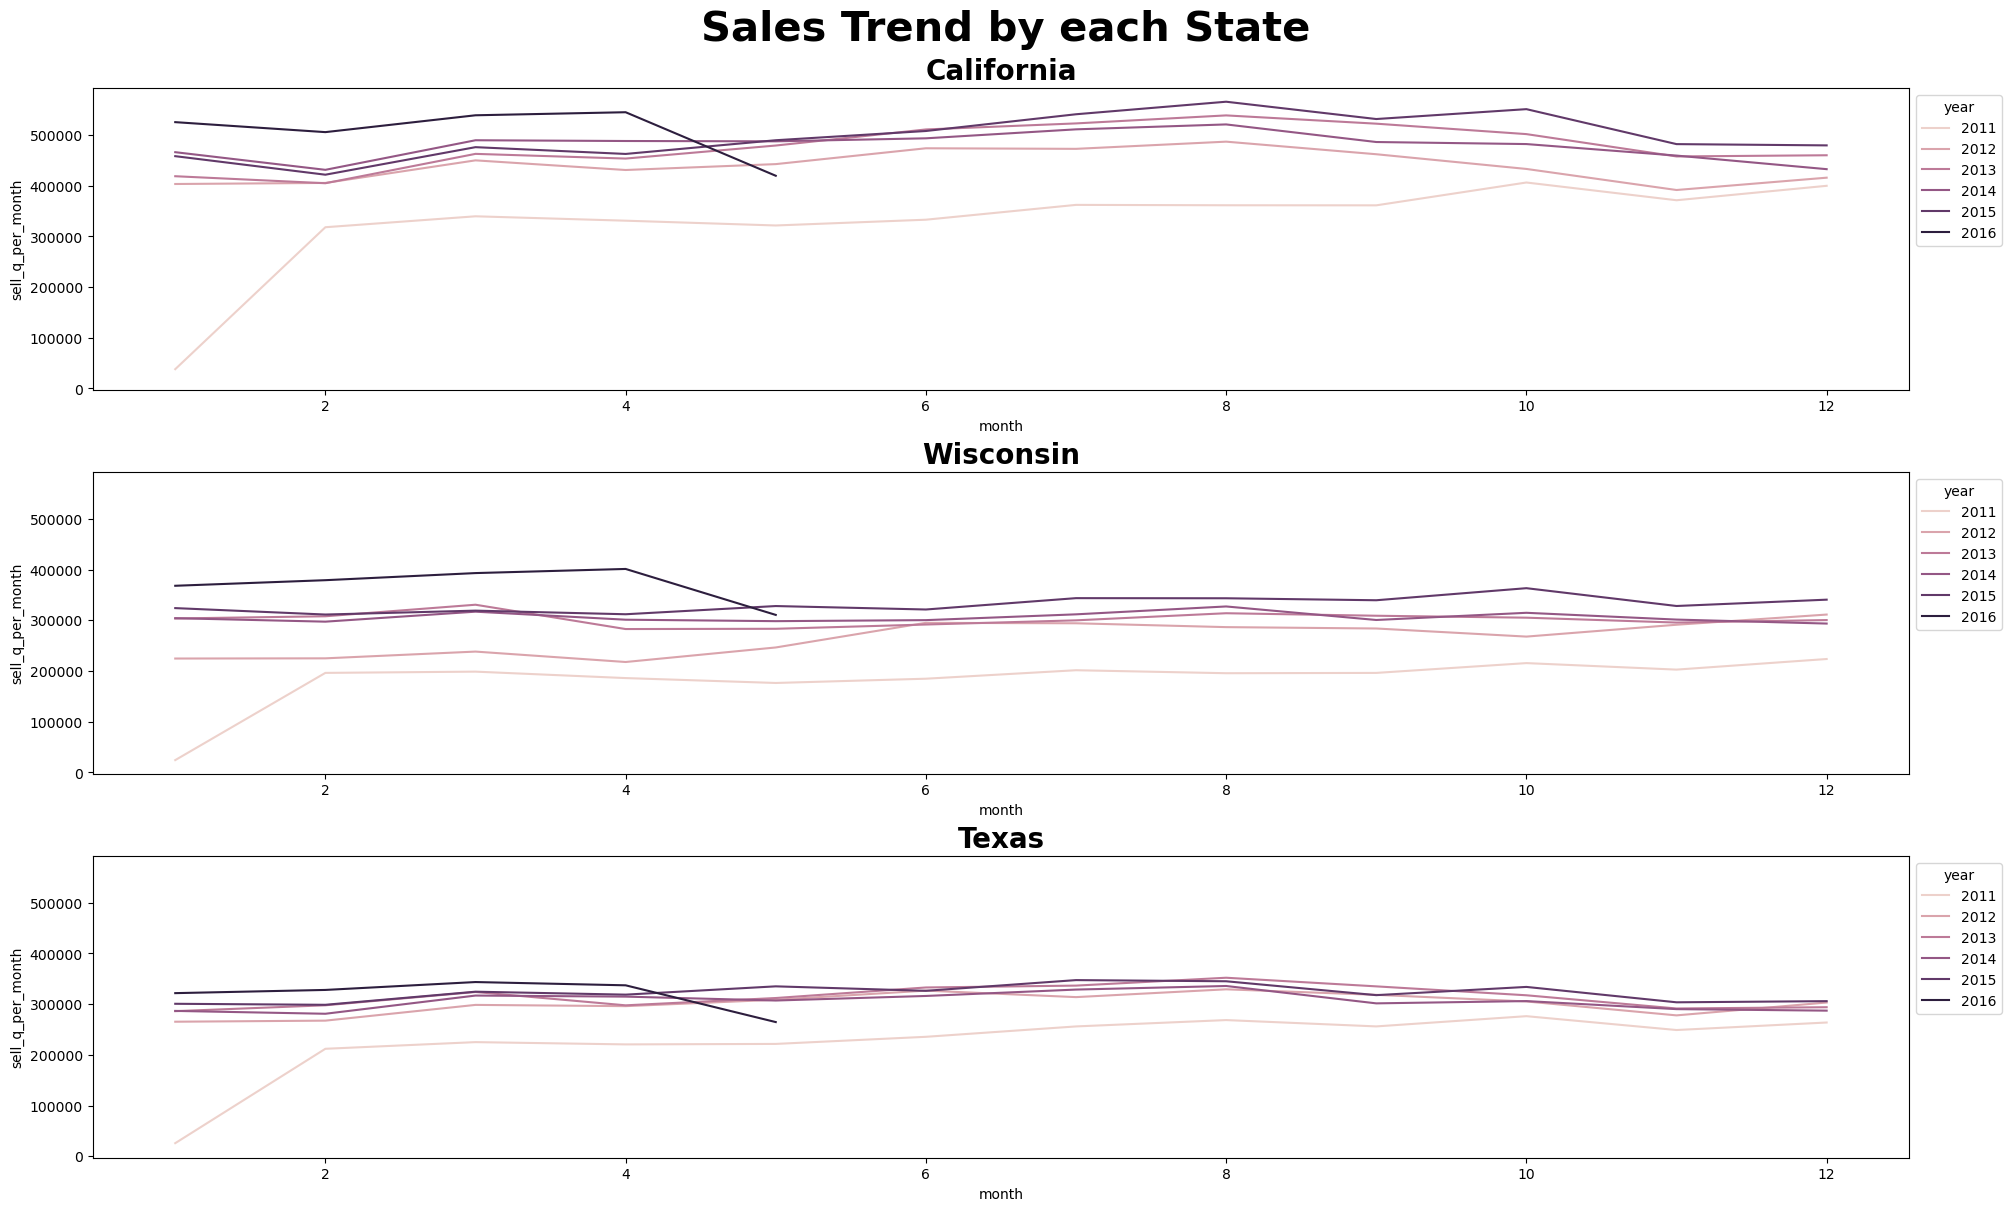

In [47]:
fig,ax =  plt.subplots(nrows= 3, ncols=1, figsize = ( 20, 12), constrained_layout=True, sharey=True) 

fig.suptitle('Sales Trend by each State', fontsize = 30, weight = 'bold')

month_graph_CA = sns.lineplot(x = "month", y = "sell_q_per_month", hue="year", data = sell_month_CA, 
                              ax = ax[0]) 
month_graph_CA.set_title('California', size = 20, weight = 'bold')
sns.move_legend(month_graph_CA, "upper left", bbox_to_anchor=(1, 1))

month_graph_WI =sns.lineplot(x = "month", y = "sell_q_per_month", hue="year",  data = sell_month_WI, 
                             ax = ax[1]) 
month_graph_WI.set_title('Wisconsin', size = 20, weight = 'bold')
sns.move_legend(month_graph_WI, "upper left", bbox_to_anchor=(1, 1))

month_graph_TX =sns.lineplot(x = "month", y = "sell_q_per_month", hue="year", data = sell_month_TX, 
                             ax = ax[2]) 
month_graph_TX.set_title('Texas', size = 20, weight = 'bold')
sns.move_legend(month_graph_TX, "upper left", bbox_to_anchor=(1, 1))